# POIN 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'F:\FILKOM\robotiik\TL-Vision\weeks\week-4\fashion-mnist_train.csv')
data = np.array(data)
np.random.shuffle(data)

# Preprocessing
m, n = data.shape
data_features = data[0:1000].T
Y_features = data_features[0]
X_features = data_features[1:n] / 255

data_labels = data[1000:m].T
Y_train = data_labels[0]
X_train = data_labels[1:n] / 255

# One-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

# Activation functions
def ReLU(Z): return np.maximum(Z, 0)
def dReLU(Z): return Z > 0
def softmax(Z): return np.exp(Z) / sum(np.exp(Z))

# Initialize parameters
def init_params():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(10, 128) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Forward propagation
def forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Backward propagation
def backward(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * dReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

# Update parameters
def update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

# Accuracy check
def get_predictions(A2): return np.argmax(A2, axis=0)
def get_accuracy(predictions, Y): return np.sum(predictions == Y) / Y.size

# Training loop
def train(X, Y, epochs, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            print(f"Epoch {i}: Accuracy = {acc:.3f}")
    return W1, b1, W2, b2

# training
W1, b1, W2, b2 = train(X_train, Y_train, epochs=100, alpha=0.1)
# prediksi
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

# Ambil satu sampel gambar (misalnya, gambar ke-0 dari data_features)
sample_image = X_features[:, 0].reshape(-1, 1)  # kolom vektor 784x1
true_label = Y_features[0]

# Lakukan prediksi
predicted_label = predict(sample_image, W1, b1, W2, b2)[0]

print(f"Label sebenarnya: {true_label}")
print(f"Prediksi model:   {predicted_label}")



def show_image(image_vector):
    plt.imshow(image_vector.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

# Tampilkan gambar yang diprediksi tadi
show_image(sample_image)



KeyboardInterrupt: 

# Poin 2

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 - 18s - 12ms/step - accuracy: 0.8179 - loss: 0.5032 - val_accuracy: 0.8686 - val_loss: 0.3594
Epoch 2/10
1500/1500 - 15s - 10ms/step - accuracy: 0.8790 - loss: 0.3347 - val_accuracy: 0.8888 - val_loss: 0.2996
Epoch 3/10
1500/1500 - 15s - 10ms/step - accuracy: 0.8966 - loss: 0.2868 - val_accuracy: 0.8957 - val_loss: 0.2815
Epoch 4/10
1500/1500 - 15s - 10ms/step - accuracy: 0.9071 - loss: 0.2521 - val_accuracy: 0.9004 - val_loss: 0.2694
Epoch 5/10
1500/1500 - 15s - 10ms/step - accuracy: 0.9175 - loss: 0.2257 - val_accuracy: 0.8990 - val_loss: 0.2785
Epoch 6/10
1500/1500 - 15s - 10ms/step - accuracy: 0.9242 - loss: 0.2037 - val_accuracy: 0.9022 - val_loss: 0.2708
Epoch 7/10
1500/1500 - 16s - 11ms/step - accuracy: 0.9329 - loss: 0.1845 - val_accuracy: 0.9084 - val_loss: 0.2665
Epoch 8/10
1500/1500 - 16s - 11ms/step - accuracy: 0.9383 - loss: 0.1662 - val_accuracy: 0.9101 - val_loss: 0.2582
Epoch 9/10
1500/1500 - 16s - 11ms/step - accuracy: 0.9435 - loss: 0.1507 - val_a

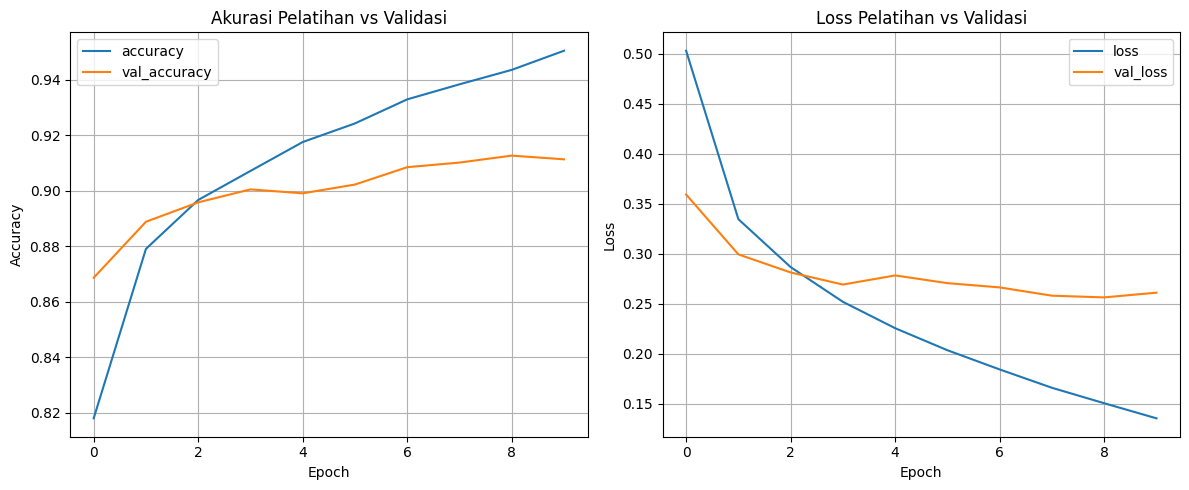

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


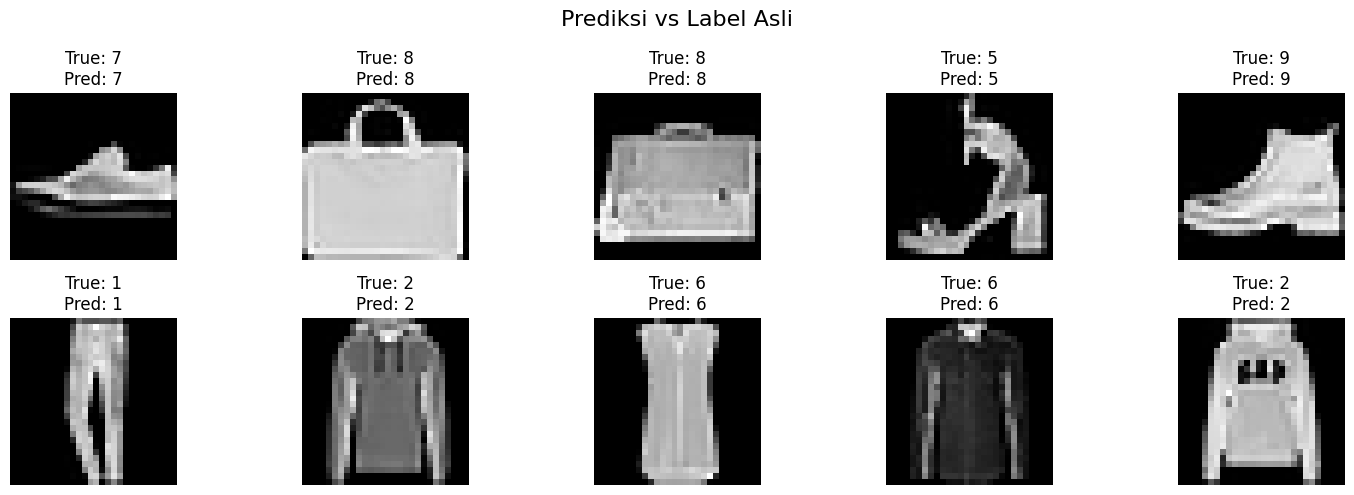

In [3]:
# -- coding: utf-8 --
"""CNN dengan Dataset dari CSV via Pandas"""

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset dari file CSV
# Ganti 'dataset.csv' dengan nama file CSV kamu
data = pd.read_csv(r'F:\FILKOM\robotiik\TL-Vision\weeks\week-4\fashion-mnist_train.csv')  # contoh nama file

# Pisahkan label dan fitur
y = data.iloc[:, 0].values             # kolom pertama = label
X = data.iloc[:, 1:].values / 255.0    # normalisasi piksel ke [0, 1]

# Ubah bentuk jadi (28, 28, 1) untuk CNN
X = X.reshape(-1, 28, 28, 1)

# Bagi data jadi train dan test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    verbose=2)

# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Akurasi CNN pada data uji: {test_acc:.4f}")

# Konversi hasil ke DataFrame
history_df = pd.DataFrame(history.history)
print("\nRingkasan Hasil Training:")
print(history_df)

# Visualisasi dari DataFrame
plt.figure(figsize=(12, 5))

# predik
def show_predictions(model, x_data, y_true, num_samples=10):
    predictions = model.predict(x_data[:num_samples])  # prediksi probabilitas
    predicted_labels = np.argmax(predictions, axis=1)  # ambil label dengan probabilitas tertinggi

    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(x_data[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.suptitle("Prediksi vs Label Asli", fontsize=16)
    plt.tight_layout()
    plt.show()


plt.subplot(1, 2, 1)
history_df[['accuracy', 'val_accuracy']].plot(ax=plt.gca())
plt.title('Akurasi Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
history_df[['loss', 'val_loss']].plot(ax=plt.gca())
plt.title('Loss Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

show_predictions(model, x_test, y_test, num_samples=10)